### Data Source 
https://www.kaggle.com/datasets/bwandowando/rotten-tomatoesall-time-best-super-hero-movies

### Regression Model
Model is built to predict the rotten tomato rank of the movie based on the features.

### Approach:
* Taking three datasets from the above source and merging them into one dataset.
* Cleaning the data.
* Performing EDA.
* Building a model to predict the rotten tomato rank of the movie based on the features.
* Evaluating the model. 



Importing the necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OrdinalEncoder

Importing CSV files

In [2]:
df_movies = pd.read_csv(r'movies.csv')
df_critics = pd.read_csv(r'critic_reviews.csv')
df_user_reviews = pd.read_csv(r'user_reviews.csv')

Previewing the data

In [3]:
df_movies.head()

,movieId,movieTitle,movieYear,movieURL,movieRank,critic_score,audience_score
0,4517f650-c60a-4edc-b37e-9236213c2b93,Spider-Man: Into the Spider-Verse,2018,https://www.rottentomatoes.com/m/spider_man_in...,1,97%,94%
1,9ddacc49-1918-3722-b5d9-4a1fa6b9b2a3,The Incredibles,2004,https://www.rottentomatoes.com/m/the_incredibles,2,97%,75%
2,e1374d4d-19b0-31b2-a6cc-c4189f2b27ca,Black Panther,2018,https://www.rottentomatoes.com/m/black_panther...,3,96%,79%
3,27539355-4940-4c29-aaab-d3fe4dafa4ee,Spider-Man: Across the Spider-Verse,2023,https://www.rottentomatoes.com/m/spider_man_ac...,4,95%,94%
4,2da44bd6-2a22-3238-a139-a40ab1769550,Teenage Mutant Ninja Turtles: Mutant Mayhem,2023,https://www.rottentomatoes.com/m/teenage_mutan...,5,95%,90%


In [5]:
df_critics.head()

,reviewId,creationDate,criticName,criticPageUrl,reviewState,isFresh,isRotten,isRtUrl,isTopCritic,publicationUrl,publicationName,reviewUrl,quote,scoreSentiment,originalScore,movieId
0,1912176,1966-07-30,Jennie Kermode,/critics/jennie-kermode,fresh,True,False,False,False,/critics/source/1869,Eye for Film,http://www.eyeforfilm.co.uk/reviews.php?id=7898,NaN,POSITIVE,4/5,7602d2ab-c9bc-3439-9cd6-d3a06e81728e
1,1895073,1998-08-21,Scott Nash,/critics/scott-nash,fresh,True,False,False,False,/critics/source/1465,Three Movie Buffs,http://www.threemoviebuffs.com/review/blade,It's stylish and fast-paced. It's also a lot o...,POSITIVE,3/4,4128b2f6-8c69-396a-a83d-0d44eb90e5f7
2,25507,2000-01-01,Roger Ebert,/critics/roger-ebert,fresh,True,False,False,True,/critics/source/67,Chicago Sun-Times,http://www.rogerebert.com/reviews/the-rocketee...,"You have to dial down, to return to an age of ...",POSITIVE,3/4,01935e47-e735-30c3-b8bd-72a9dbbcfa8a
3,25508,2000-01-01,NaN,NaN,rotten,False,True,False,True,/critics/source/148,Empire Magazine,http://www.empireonline.com/reviews/reviewcomp...,Reaches for the skies but runs out of fuel.,NEGATIVE,2/5,01935e47-e735-30c3-b8bd-72a9dbbcfa8a
4,25509,2000-01-01,Joe Brown,/critics/joe-brown,fresh,True,False,False,True,/critics/source/474,Washington Post,http://www.washingtonpost.com/wp-srv/style/lon...,"Based on a comic book, deliciously corny but n...",POSITIVE,NaN,01935e47-e735-30c3-b8bd-72a9dbbcfa8a


Checking for imbalanced data

In [7]:
df_critics['publicationName'].value_counts()

publicationName
eFilmCritic.com              144
Washington Post              104
Reeling Reviews              100
Time Out                     100
New York Times                98
                            ... 
Night Vision                   1
Culture Trip                   1
Blunt Magazine                 1
Bust Magazine                  1
Fort Worth Business Press      1
Name: count, Length: 1755, dtype: int64

Grouping the publications into quantiles based on popularity.

In [8]:
# Calculate the value counts
value_counts = df_critics['publicationName'].value_counts()

# Determine the quantile thresholds
quantiles = pd.qcut(value_counts, 4, labels=['1', '2', '3', '4'])

# Create a mapping from publicationName to quantile group
quantile_mapping = quantiles.to_dict()

# Map the publicationName to its quantile group
df_critics['publicationGroup'] = df_critics['publicationName'].map(quantile_mapping)

# Display the first few rows to verify the new column
print(df_critics.head())

   reviewId creationDate      criticName            criticPageUrl reviewState  \
0   1912176   1966-07-30  Jennie Kermode  /critics/jennie-kermode       fresh   
1   1895073   1998-08-21      Scott Nash      /critics/scott-nash       fresh   
2     25507   2000-01-01     Roger Ebert     /critics/roger-ebert       fresh   
3     25508   2000-01-01             NaN                      NaN      rotten   
4     25509   2000-01-01       Joe Brown       /critics/joe-brown       fresh   

   isFresh  isRotten isRtUrl  isTopCritic        publicationUrl  \
0     True     False   False        False  /critics/source/1869   
1     True     False   False        False  /critics/source/1465   
2     True     False   False         True    /critics/source/67   
3    False      True   False         True   /critics/source/148   
4     True     False   False         True   /critics/source/474   

     publicationName                                          reviewUrl  \
0       Eye for Film    http://www.

In [9]:
quantile_mapping

{'eFilmCritic.com': '4',
 'Washington Post': '4',
 'Reeling Reviews': '4',
 'Time Out': '4',
 'New York Times': '4',
 'Guardian': '4',
 'Espinof': '4',
 'Variety': '4',
 'Empire Magazine': '4',
 'ComingSoon.net': '4',
 'Kaplan vs. Kaplan': '4',
 'Austin Chronicle': '4',
 'Cinema Crazed': '4',
 'ReelViews': '4',
 'Hollywood Reporter': '4',
 'Entertainment Weekly': '4',
 'Los Angeles Times': '4',
 'Laramie Movie Scope': '4',
 'Forbes': '4',
 "One Guy's Opinion": '4',
 'Boston Globe': '4',
 'Chicago Reader': '4',
 'Chicago Tribune': '4',
 'Globe and Mail': '4',
 'Film Threat': '4',
 'Slant Magazine': '4',
 'Common Sense Media': '4',
 'Daily Express (UK)': '4',
 'Gone With The Twins': '4',
 "JoBlo's Movie Network": '4',
 'Rolling Stone': '4',
 'IGN Movies': '4',
 'Reel Film Reviews': '4',
 'New York Post': '4',
 'CinemaBlend': '4',
 'Aisle Seat': '4',
 'Chicago Sun-Times': '4',
 'San Francisco Chronicle': '4',
 'PopMatters': '4',
 'Detroit News': '4',
 'Flickering Myth': '4',
 'Associated 

In [10]:
df_critics.head(20)

,reviewId,creationDate,criticName,criticPageUrl,reviewState,isFresh,isRotten,isRtUrl,isTopCritic,publicationUrl,publicationName,reviewUrl,quote,scoreSentiment,originalScore,movieId,publicationGroup
0,1912176,1966-07-30,Jennie Kermode,/critics/jennie-kermode,fresh,True,False,False,False,/critics/source/1869,Eye for Film,http://www.eyeforfilm.co.uk/reviews.php?id=7898,NaN,POSITIVE,4/5,7602d2ab-c9bc-3439-9cd6-d3a06e81728e,3
1,1895073,1998-08-21,Scott Nash,/critics/scott-nash,fresh,True,False,False,False,/critics/source/1465,Three Movie Buffs,http://www.threemoviebuffs.com/review/blade,It's stylish and fast-paced. It's also a lot o...,POSITIVE,3/4,4128b2f6-8c69-396a-a83d-0d44eb90e5f7,4
2,25507,2000-01-01,Roger Ebert,/critics/roger-ebert,fresh,True,False,False,True,/critics/source/67,Chicago Sun-Times,http://www.rogerebert.com/reviews/the-rocketee...,"You have to dial down, to return to an age of ...",POSITIVE,3/4,01935e47-e735-30c3-b8bd-72a9dbbcfa8a,4
3,25508,2000-01-01,NaN,NaN,rotten,False,True,False,True,/critics/source/148,Empire Magazine,http://www.empireonline.com/reviews/reviewcomp...,Reaches for the skies but runs out of fuel.,NEGATIVE,2/5,01935e47-e735-30c3-b8bd-72a9dbbcfa8a,4
4,25509,2000-01-01,Joe Brown,/critics/joe-brown,fresh,True,False,False,True,/critics/source/474,Washington Post,http://www.washingtonpost.com/wp-srv/style/lon...,"Based on a comic book, deliciously corny but n...",POSITIVE,NaN,01935e47-e735-30c3-b8bd-72a9dbbcfa8a,4
5,25510,2000-01-01,Hal Hinson,/critics/hal-hinson,rotten,False,True,False,True,/critics/source/474,Washington Post,http://www.washingtonpost.com/wp-srv/style/lon...,"It's a humble little item, actually, easily di...",NEGATIVE,NaN,01935e47-e735-30c3-b8bd-72a9dbbcfa8a,4
6,25516,2000-01-01,Steve Rhodes,/critics/steve-rhodes,rotten,False,True,False,False,/critics/source/703,Internet Reviews,http://reviews.imdb.com/Reviews/77/7795,The problem with the film is that it is nothin...,NEGATIVE,2/4,01935e47-e735-30c3-b8bd-72a9dbbcfa8a,4
7,25518,2000-01-01,James O'Ehley,/critics/james-oehley,rotten,False,True,False,False,/critics/source/1819,Sci-Fi Movie Page,http://www.scifimoviepage.com/rocket.html,"Okay special effects, but the story tends to d...",NEGATIVE,2.5/4,01935e47-e735-30c3-b8bd-72a9dbbcfa8a,4
8,25519,2000-01-01,Marc Savlov,/critics/marc-savlov,fresh,True,False,False,True,/critics/source/28,Austin Chronicle,http://www.austinchronicle.com/gyrobase/Calend...,"Such an idealized time never really existed, t...",POSITIVE,3.5/5,01935e47-e735-30c3-b8bd-72a9dbbcfa8a,4
9,25525,2000-01-01,Chris Hicks,/critics/chris-hicks,rotten,False,True,False,False,/critics/source/121,Deseret News (Salt Lake City),http://www.deseretnews.com/article/700001558/T...,".. has its exciting and amusing moments, but o...",NEGATIVE,NaN,01935e47-e735-30c3-b8bd-72a9dbbcfa8a,4


In [11]:
df_user_reviews.head()

,movieId,rating,quote,reviewId,isVerified,isSuperReviewer,hasSpoilers,hasProfanity,score,creationDate,userDisplayName,userRealm,userId
0,13905397-4673-3e05-954d-8840645bebc2,1.0,"Did.Not.Like.\n\nThis movie was boring, overse...",NaN,False,False,False,False,1.0,2001-03-07,NaN,RT,901245019
1,13905397-4673-3e05-954d-8840645bebc2,4.5,[font=Arial]i never read the original story. ...,NaN,False,False,False,False,4.5,2002-03-08,NaN,RT,901245679
2,a2b255da-eb4d-3436-804b-fbe7b8732097,3.5,[left][b][font=Book Antiqua]xxxxx[/font][/b][/...,NaN,False,False,False,False,3.5,2002-09-03,NaN,RT,900608936
3,94a040f3-e1db-33b0-b7aa-6187e1406d21,2.0,"Art films can't center around gigantic, green ...",NaN,False,False,False,False,2.0,2003-01-21,NaN,RT,900592542
4,df35d67b-c89e-30fa-bff5-c31006cc6ae4,3.5,"dude, X-men 2 rocks! better then the first one...",NaN,False,False,False,False,3.5,2003-05-02,NaN,RT,900659519


In [12]:
df_user_reviews.columns

Index(['movieId', 'rating', 'quote', 'reviewId', 'isVerified',
       'isSuperReviewer', 'hasSpoilers', 'hasProfanity', 'score',
       'creationDate', 'userDisplayName', 'userRealm', 'userId'],
      dtype='object')

Dropping columsn no longer needed

In [13]:
df_user_reviews=df_user_reviews.drop(columns=['quote', 'reviewId', 'creationDate', 'userDisplayName', 'userRealm', 'userId'])

In [14]:
df_movies = df_movies.drop(columns=['movieTitle', 'movieYear', 'movieURL'])

In [15]:
df_critics.head()

,reviewId,creationDate,criticName,criticPageUrl,reviewState,isFresh,isRotten,isRtUrl,isTopCritic,publicationUrl,publicationName,reviewUrl,quote,scoreSentiment,originalScore,movieId,publicationGroup
0,1912176,1966-07-30,Jennie Kermode,/critics/jennie-kermode,fresh,True,False,False,False,/critics/source/1869,Eye for Film,http://www.eyeforfilm.co.uk/reviews.php?id=7898,NaN,POSITIVE,4/5,7602d2ab-c9bc-3439-9cd6-d3a06e81728e,3
1,1895073,1998-08-21,Scott Nash,/critics/scott-nash,fresh,True,False,False,False,/critics/source/1465,Three Movie Buffs,http://www.threemoviebuffs.com/review/blade,It's stylish and fast-paced. It's also a lot o...,POSITIVE,3/4,4128b2f6-8c69-396a-a83d-0d44eb90e5f7,4
2,25507,2000-01-01,Roger Ebert,/critics/roger-ebert,fresh,True,False,False,True,/critics/source/67,Chicago Sun-Times,http://www.rogerebert.com/reviews/the-rocketee...,"You have to dial down, to return to an age of ...",POSITIVE,3/4,01935e47-e735-30c3-b8bd-72a9dbbcfa8a,4
3,25508,2000-01-01,NaN,NaN,rotten,False,True,False,True,/critics/source/148,Empire Magazine,http://www.empireonline.com/reviews/reviewcomp...,Reaches for the skies but runs out of fuel.,NEGATIVE,2/5,01935e47-e735-30c3-b8bd-72a9dbbcfa8a,4
4,25509,2000-01-01,Joe Brown,/critics/joe-brown,fresh,True,False,False,True,/critics/source/474,Washington Post,http://www.washingtonpost.com/wp-srv/style/lon...,"Based on a comic book, deliciously corny but n...",POSITIVE,NaN,01935e47-e735-30c3-b8bd-72a9dbbcfa8a,4


In [16]:
df_critics.columns

Index(['reviewId', 'creationDate', 'criticName', 'criticPageUrl',
       'reviewState', 'isFresh', 'isRotten', 'isRtUrl', 'isTopCritic',
       'publicationUrl', 'publicationName', 'reviewUrl', 'quote',
       'scoreSentiment', 'originalScore', 'movieId', 'publicationGroup'],
      dtype='object')

In [17]:
df_critics=df_critics.drop(columns=['reviewId', 'creationDate', 'criticName', 'criticPageUrl','publicationUrl', 'publicationName', 'reviewUrl', 'quote'])

Attempting to join the datasets

In [18]:
dfmc = pd.merge(df_movies, df_critics, on='movieId')

df_merged = pd.merge(dfmc, df_user_reviews, on='movieId')
Produced memory error, so I will use the following code to merge the dataframes

In [19]:
df_user_reviews['rating'].value_counts()

rating
5.0    680511
4.0    398229
4.5    268320
3.5    261552
3.0    235557
2.5    115914
2.0     97995
0.5     62763
1.0     54332
1.5     49410
Name: count, dtype: int64

Due to memory error, I will merge the dataframes using the following code (splitting the dataframes into chunks). Will start by creating dfur2 filtered on the rating column.

In [20]:
dfur2 =df_user_reviews[df_user_reviews['rating'] <= 2.0]

In [21]:
df_merged = pd.merge(dfmc, dfur2, on='movieId')

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78025923 entries, 0 to 78025922
Data columns (total 18 columns):
 #   Column            Dtype  
---  ------            -----  
 0   movieId           object 
 1   movieRank         int64  
 2   critic_score      object 
 3   audience_score    object 
 4   reviewState       object 
 5   isFresh           bool   
 6   isRotten          bool   
 7   isRtUrl           object 
 8   isTopCritic       bool   
 9   scoreSentiment    object 
 10  originalScore     object 
 11  publicationGroup  object 
 12  rating            float64
 13  isVerified        bool   
 14  isSuperReviewer   bool   
 15  hasSpoilers       bool   
 16  hasProfanity      bool   
 17  score             float64
dtypes: bool(7), float64(2), int64(1), object(8)
memory usage: 6.9+ GB


Creating dfur3 filtered on the rating column

In [ ]:
dfur3 =df_user_reviews[(df_user_reviews['rating'] == 2.5)]

In [ ]:
dfur3

,movieId,rating,isVerified,isSuperReviewer,hasSpoilers,hasProfanity,score
17,94a040f3-e1db-33b0-b7aa-6187e1406d21,2.5,False,False,False,False,2.5
21,94a040f3-e1db-33b0-b7aa-6187e1406d21,2.5,False,False,False,False,2.5
26,94a040f3-e1db-33b0-b7aa-6187e1406d21,2.5,False,False,False,False,2.5
29,94a040f3-e1db-33b0-b7aa-6187e1406d21,2.5,False,False,False,False,2.5
80,e70c15a3-eb05-3f65-9988-a1787615d464,2.5,False,False,False,False,2.5
...,...,...,...,...,...,...,...
2224399,0e71cf84-e236-3ed7-9d91-3df34e6b2fae,2.5,False,False,False,True,2.5
2224411,82319c4b-655b-3c25-8416-00222e21097f,2.5,False,False,False,False,2.5
2224417,e1374d4d-19b0-31b2-a6cc-c4189f2b27ca,2.5,False,False,False,False,2.5
2224556,82319c4b-655b-3c25-8416-00222e21097f,2.5,False,False,False,True,2.5


Attempting to merge the dataframes while managing memory error

In [ ]:
# Specify the data types for columns 8 and 11
dtype_spec = {
    8: 'str',  
    11: 'str'  
}

# Define chunk size
chunk_size = 10000  

# Initialize an empty list to hold the chunks
chunks = []

# Read the CSV file in chunks
for chunk in pd.read_csv(r'merged_review_data.csv', dtype=dtype_spec, low_memory=False, chunksize=chunk_size):
    chunks.append(chunk)

# Concatenate all chunks into a single DataFrame
df_merged = pd.concat(chunks, ignore_index=True)

Still producing errors

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78025923 entries, 0 to 78025922
Data columns (total 18 columns):
 #   Column            Dtype  
---  ------            -----  
 0   movieId           object 
 1   movieRank         int64  
 2   critic_score      object 
 3   audience_score    object 
 4   reviewState       object 
 5   isFresh           bool   
 6   isRotten          bool   
 7   isRtUrl           object 
 8   isTopCritic       bool   
 9   scoreSentiment    object 
 10  originalScore     object 
 11  publicationGroup  object 
 12  rating            float64
 13  isVerified        bool   
 14  isSuperReviewer   bool   
 15  hasSpoilers       bool   
 16  hasProfanity      bool   
 17  score             float64
dtypes: bool(7), float64(2), int64(1), object(8)
memory usage: 6.9+ GB


In [ ]:
df_merged.head()

,Unnamed: 0,movieId,movieRank,critic_score,audience_score,reviewState,isFresh,isRotten,isRtUrl,isTopCritic,scoreSentiment,originalScore,publicationGroup,rating,isVerified,isSuperReviewer,hasSpoilers,hasProfanity,score
0,0,4517f650-c60a-4edc-b37e-9236213c2b93,1,97%,94%,fresh,True,False,False,False,POSITIVE,4/5,3,0.5,False,False,False,False,0.5
1,1,4517f650-c60a-4edc-b37e-9236213c2b93,1,97%,94%,fresh,True,False,False,False,POSITIVE,4/5,3,0.5,False,False,False,False,0.5
2,2,4517f650-c60a-4edc-b37e-9236213c2b93,1,97%,94%,fresh,True,False,False,False,POSITIVE,4/5,3,2.0,False,False,False,False,2.0
3,3,4517f650-c60a-4edc-b37e-9236213c2b93,1,97%,94%,fresh,True,False,False,False,POSITIVE,4/5,3,2.0,False,False,False,False,2.0
4,4,4517f650-c60a-4edc-b37e-9236213c2b93,1,97%,94%,fresh,True,False,False,False,POSITIVE,4/5,3,0.5,False,False,False,False,0.5


Attempting to merge the dataframes using the following code.

In [ ]:
# Define chunk size
chunk_size = 500  # Adjust the chunk size as needed

# Initialize an empty list to hold the merged chunks
merged_chunks = []

# Read the second DataFrame in chunks and merge with the first DataFrame
for chunk in pd.read_csv(r'dfur3.csv', chunksize=chunk_size):
    merged_chunk = pd.merge(df_merged, chunk, on='movieId')
    merged_chunks.append(merged_chunk)

# Concatenate all merged chunks into a single DataFrame
df_merged_final = pd.concat(merged_chunks, ignore_index=True)

In [ ]:
# Define chunk size
chunk_size = 500  # Adjust the chunk size as needed

# Initialize the merged DataFrame with the first chunk
first_chunk = True

# Read the second DataFrame in chunks and merge with the first DataFrame
for chunk in pd.read_csv(r'dfur3.csv', chunksize=chunk_size):
    if first_chunk:
        df_merged_final = pd.merge(df_merged, chunk, on='movieId')
        first_chunk = False
    else:
        merged_chunk = pd.merge(df_merged_final, chunk, on='movieId')
        df_merged_final = pd.concat([df_merged_final, merged_chunk], ignore_index=True)


Exploring the merged data to merge it in SQL

In [ ]:
dfur3.to_csv(r'dfur3.csv')

In [ ]:
df_merged.to_csv(r'merged_review_data.csv')

Since I couldnt fix the memory issues. I Used the csv exports to merge the dataframes in SQL server and then imported the merged dataframes to the notebook.

(CREATE VIEW vMovies AS
SELECT 
	   [movieId]
      ,[movieRank]
      ,CAST(REPLACE([critic_score], '%', '') AS decimal(10,2))/100 AS [critic_score]
	  ,CAST(REPLACE([audience_score], '%', '') AS decimal(10,2)  )/100 AS [audience_score]
  FROM [rotten_tomato_movie_reivews].[dbo].[movies])

  ------------------------------------------
  and then

  (SELECT 
       cr.[movieId]
	  ,cr.[isFresh]
      ,cr.[isRotten]
      ,cr.[isTopCritic]
	  , CASE WHEN cr.scoreSentiment = 'POSITIVE' THEN 1 ELSE 0 END AS scoreSentiment
      ,nur.[rating]
      ,nur.[isVerified]
      ,nur.[isSuperReviewer]
      ,nur.[hasSpoilers]
      ,nur.[hasProfanity]
	  ,vm.[movieRank]
      ,vm.[critic_score]
      ,vm.[audience_score]
INTO mergedMovieData
FROM [rotten_tomato_movie_reivews].[dbo].[critic_reviews] AS cr
  INNER JOIN [new_user_review] AS nur ON cr.[movieId] = nur.[movieId]
  INNER JOIN [rotten_tomato_movie_reivews].[dbo].[vMovies] AS vm ON cr.[movieId] = vm.[movieId]
)

In [2]:
df = pd.read_csv(r'sql_merged_review_data.csv')

checking for Nulls

In [3]:
df.isnull().sum()

movieId            0
isFresh            0
isRotten           0
isTopCritic        0
scoreSentiment     0
rating             0
isVerified         0
isSuperReviewer    0
hasSpoilers        0
hasProfanity       0
movieRank          0
critic_score       0
audience_score     0
dtype: int64

Creating a copy of the merged data.

In [4]:
df_reviews = df.copy()

In [5]:
df_reviews.head()

,movieId,isFresh,isRotten,isTopCritic,scoreSentiment,rating,isVerified,isSuperReviewer,hasSpoilers,hasProfanity,movieRank,critic_score,audience_score
0,e1374d4d-19b0-31b2-a6cc-c4189f2b27ca,True,False,False,1,3.0,False,False,True,True,3,0.96,0.79
1,9ddacc49-1918-3722-b5d9-4a1fa6b9b2a3,False,True,False,0,5.0,False,False,False,False,2,0.97,0.75
2,9ddacc49-1918-3722-b5d9-4a1fa6b9b2a3,True,False,True,1,1.5,False,False,False,False,2,0.97,0.75
3,6f0cd05c-4a2d-3f04-8c29-144523fd4db7,False,True,True,0,2.5,False,False,False,False,81,0.67,0.75
4,3fbc9d82-14f0-3592-a00c-4f67b2a0da70,False,True,True,0,3.5,False,True,False,False,99,0.56,0.75


In [6]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12309 entries, 0 to 12308
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movieId          12309 non-null  object 
 1   isFresh          12309 non-null  bool   
 2   isRotten         12309 non-null  bool   
 3   isTopCritic      12309 non-null  bool   
 4   scoreSentiment   12309 non-null  int64  
 5   rating           12309 non-null  float64
 6   isVerified       12309 non-null  bool   
 7   isSuperReviewer  12309 non-null  bool   
 8   hasSpoilers      12309 non-null  bool   
 9   hasProfanity     12309 non-null  bool   
 10  movieRank        12309 non-null  int64  
 11  critic_score     12309 non-null  float64
 12  audience_score   12309 non-null  float64
dtypes: bool(7), float64(3), int64(2), object(1)
memory usage: 661.3+ KB


Dropping the movieId column

In [10]:
df_reviews = df_reviews.drop(columns=['movieId'])

Checking for imbalances in the data

In [11]:
df_reviews['isSuperReviewer'].value_counts()

isSuperReviewer
False    9483
True     2826
Name: count, dtype: int64

In [12]:
df_reviews['hasSpoilers'].value_counts()

hasSpoilers
False    10722
True      1587
Name: count, dtype: int64

In [13]:
df_reviews['isVerified'].value_counts()

isVerified
False    10526
True      1783
Name: count, dtype: int64

In [14]:
df_reviews['hasProfanity'].value_counts()

hasProfanity
False    8851
True     3458
Name: count, dtype: int64

In [15]:
df_reviews.head()

,isFresh,isRotten,isTopCritic,scoreSentiment,rating,isVerified,isSuperReviewer,hasSpoilers,hasProfanity,movieRank,critic_score,audience_score
0,True,False,False,1,3.0,False,False,True,True,3,0.96,0.79
1,False,True,False,0,5.0,False,False,False,False,2,0.97,0.75
2,True,False,True,1,1.5,False,False,False,False,2,0.97,0.75
3,False,True,True,0,2.5,False,False,False,False,81,0.67,0.75
4,False,True,True,0,3.5,False,True,False,False,99,0.56,0.75


Converting True and False to 1 and 0

In [16]:
df_reviews['Verified'] = [0 if str(i).strip() == 'False' else 1 for i in df_reviews['isVerified']]

In [17]:
df_reviews['Spoilers'] = [1 if str(i).strip() == 'True' else 0 for i in df_reviews['hasSpoilers']]

In [18]:
df_reviews['Profanity'] = [1 if str(i).strip() == 'True' else 0 for i in df_reviews['hasProfanity']]

In [19]:
df_reviews['SuperReviewer'] = [1 if str(i).strip() == 'True' else 0 for i in df_reviews['isSuperReviewer']]

In [20]:
df_reviews = df_reviews.drop(columns=['isVerified',	'isSuperReviewer',	'hasSpoilers',	'hasProfanity'	])

In [21]:
df_reviews['Fresh'] = [1 if str(i).strip() == 'True' else 0 for i in df_reviews['isFresh']]

In [22]:
df_reviews['Rotten'] = [1 if str(i).strip() == 'True' else 0 for i in df_reviews['isRotten']]

In [23]:
df_reviews['TopCritic'] = [1 if str(i).strip() == 'True' else 0 for i in df_reviews['isTopCritic']]

In [24]:
df_reviews.columns

Index(['isFresh', 'isRotten', 'isTopCritic', 'scoreSentiment', 'rating',
       'movieRank', 'critic_score', 'audience_score', 'Verified', 'Spoilers',
       'Profanity', 'SuperReviewer', 'Fresh', 'Rotten', 'TopCritic'],
      dtype='object')

Dropping columns that are no longer needed

In [25]:
df_reviews = df_reviews.drop(columns=['isFresh', 'isRotten', 'isTopCritic'])

In [26]:
df_reviews.head()

,scoreSentiment,rating,movieRank,critic_score,audience_score,Verified,Spoilers,Profanity,SuperReviewer,Fresh,Rotten,TopCritic
0,1,3.0,3,0.96,0.79,0,1,1,0,1,0,0
1,0,5.0,2,0.97,0.75,0,0,0,0,0,1,0
2,1,1.5,2,0.97,0.75,0,0,0,0,1,0,1
3,0,2.5,81,0.67,0.75,0,0,0,0,0,1,1
4,0,3.5,99,0.56,0.75,0,0,0,1,0,1,1


Previewing the data

array([[<Axes: title={'center': 'scoreSentiment'}>,
        <Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'movieRank'}>],
       [<Axes: title={'center': 'critic_score'}>,
        <Axes: title={'center': 'audience_score'}>,
        <Axes: title={'center': 'Verified'}>],
       [<Axes: title={'center': 'Spoilers'}>,
        <Axes: title={'center': 'Profanity'}>,
        <Axes: title={'center': 'SuperReviewer'}>],
       [<Axes: title={'center': 'Fresh'}>,
        <Axes: title={'center': 'Rotten'}>,
        <Axes: title={'center': 'TopCritic'}>]], dtype=object)

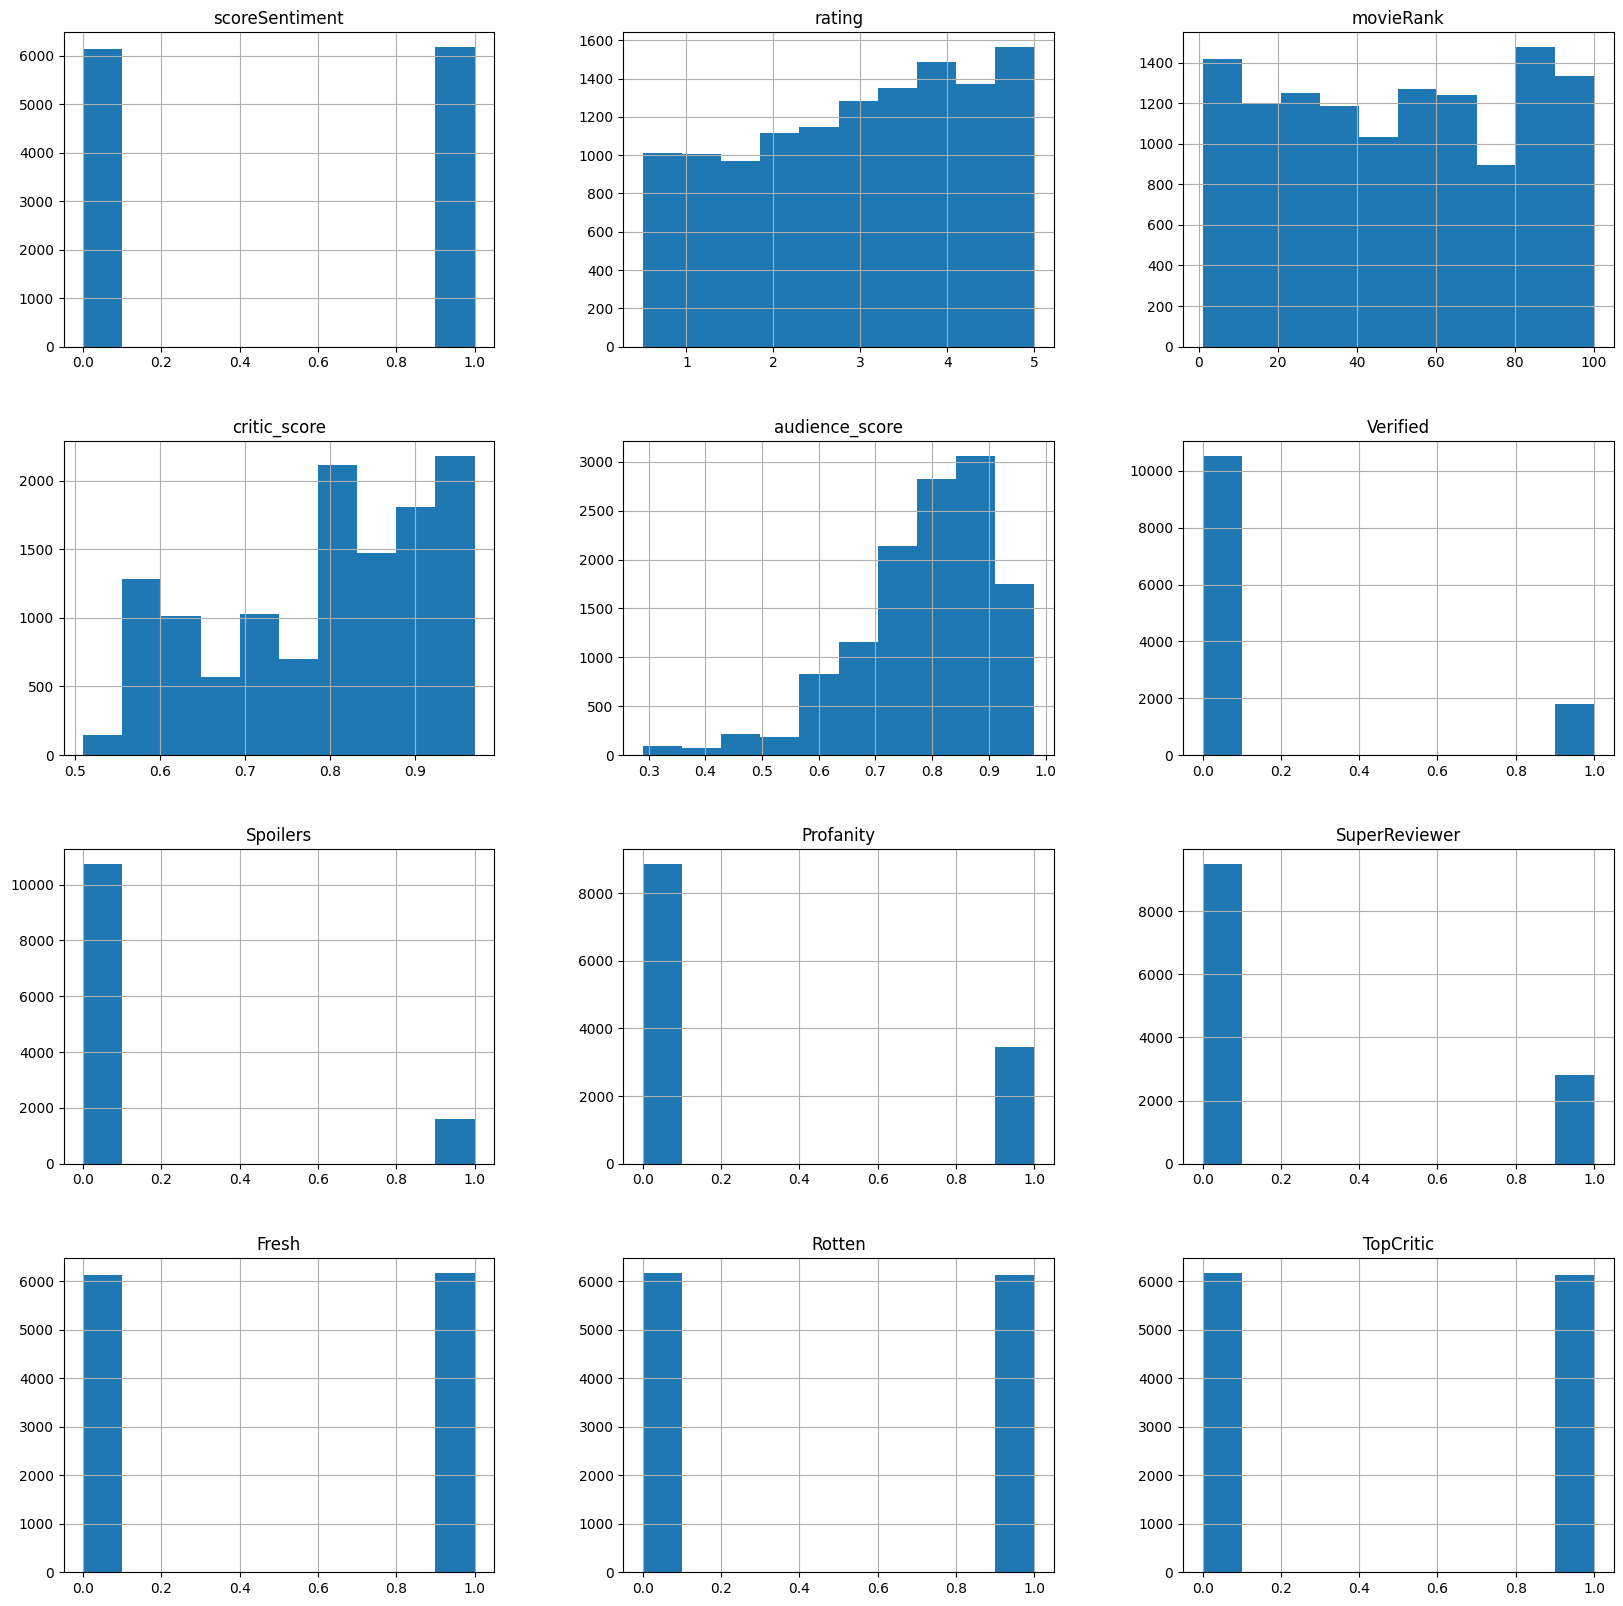

In [27]:
df_reviews.hist(figsize=(20,20))

Creating a mask for the correlations matrix.

In [28]:
df_corr = df_reviews.corr()

In [29]:
mask = ~((df_corr > 0.1) | (df_corr< -0.1))

In [30]:
import matplotlib.pyplot as plt

Plotting the matrix.

<Axes: >

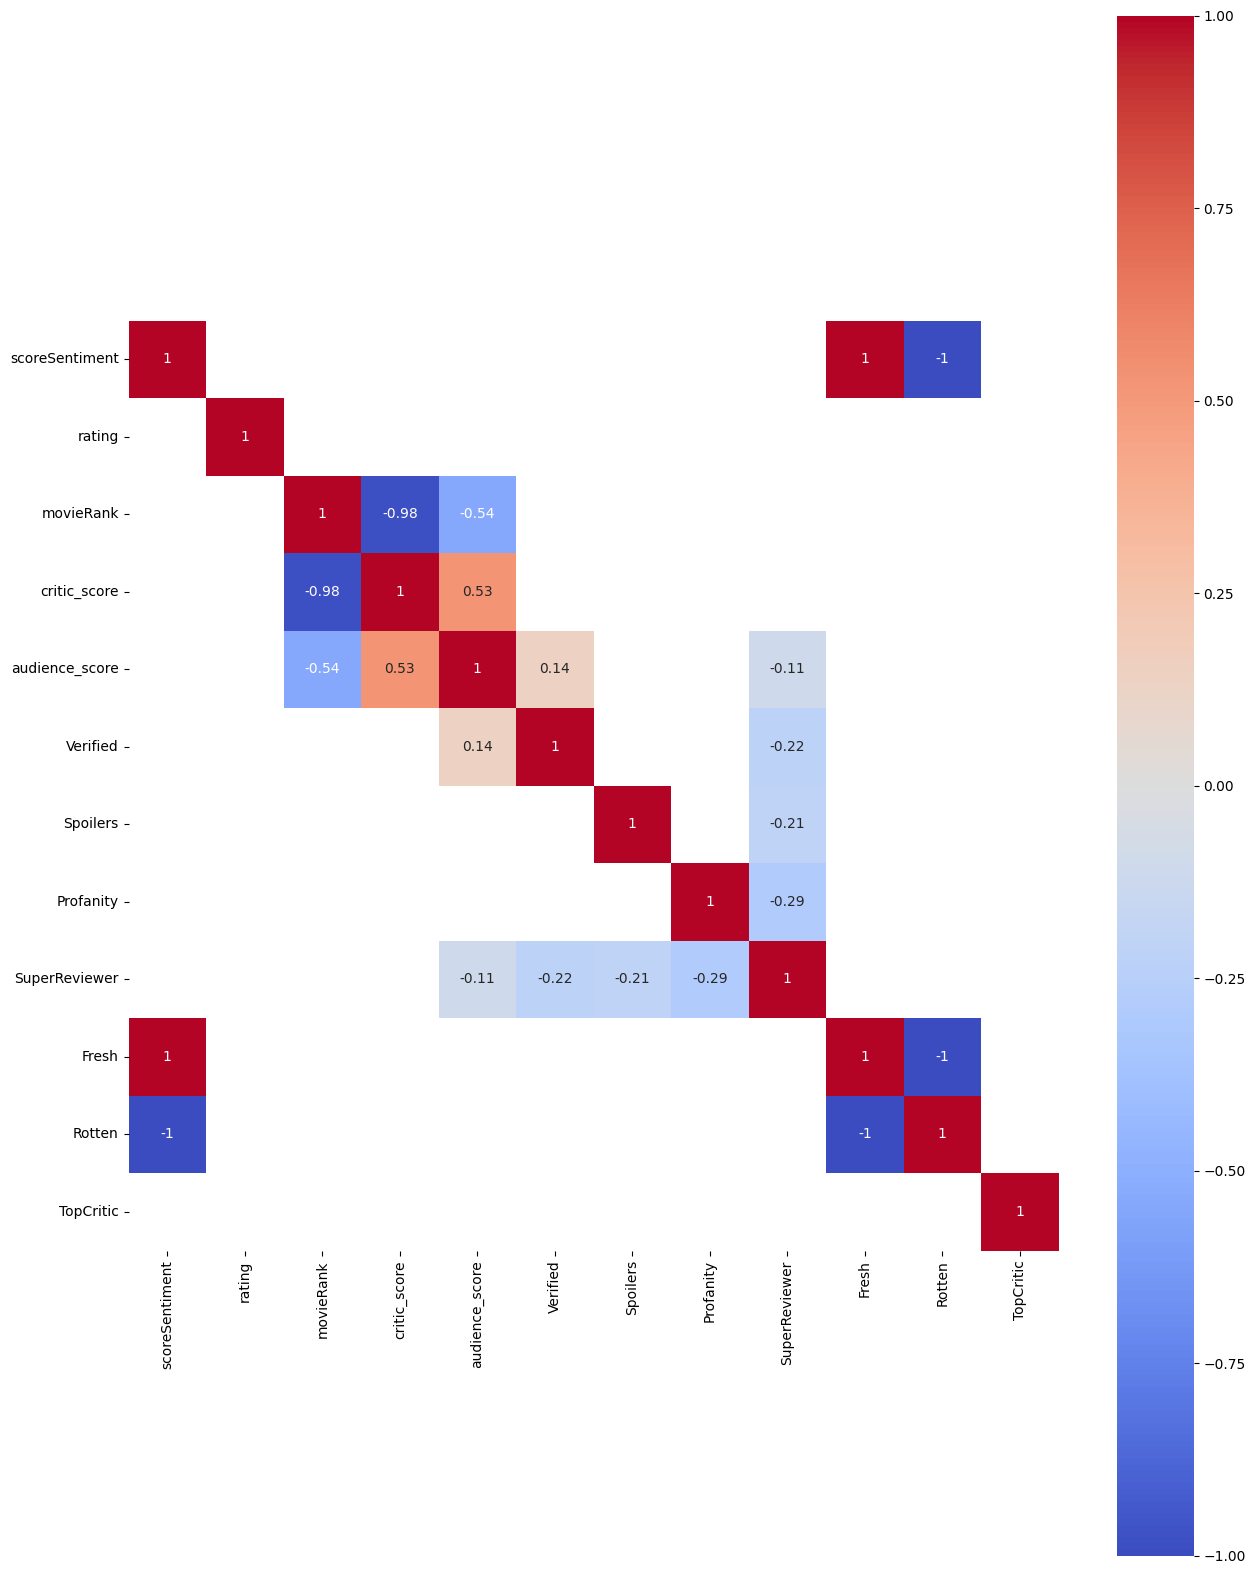

In [31]:
plt.figure(figsize=(15,20))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', square=True, mask=mask)

The correlation matrix shows only two columns with a strong correlation when compared to the movieRank column.

In [32]:
df_reviews.head()

,scoreSentiment,rating,movieRank,critic_score,audience_score,Verified,Spoilers,Profanity,SuperReviewer,Fresh,Rotten,TopCritic
0,1,3.0,3,0.96,0.79,0,1,1,0,1,0,0
1,0,5.0,2,0.97,0.75,0,0,0,0,0,1,0
2,1,1.5,2,0.97,0.75,0,0,0,0,1,0,1
3,0,2.5,81,0.67,0.75,0,0,0,0,0,1,1
4,0,3.5,99,0.56,0.75,0,0,0,1,0,1,1


## Including interaction terms to improve the model. 

columns = ['scoreSentiment', 'rating', 'Rotten', 'TopCritic', 'movieRank']
imputer = SimpleImputer(strategy='mean')
df_r[columns] = imputer.fit_transform(df_r[columns])
poly = PolynomialFeatures()
interaction_terms = poly.fit_transform(df_r[columns])
interaction_df = pd.DataFrame(interaction_terms, columns=poly.get_feature_names_out(['scoreSentiment', 'rating', 'Rotten', 'TopCritic', 'movieRank']))

df_r['AudienceRatedTop'] = [1 if i >= 0.75 else 0 for i in df_r['audience_score']]
df_r['CriticsRatedTop'] = [1 if i >= 0.75 else 0 for i in df_r['critic_score']]

Will manually create the interaction terms. 

In [33]:
df_reviews['Rating_squareroot'] = df_reviews['rating']**0.5

In [34]:
df_reviews['Critic_score_squareroot']= df_reviews['critic_score']**0.5

In [35]:
df_reviews['Audience_score_squareroot'] = df_reviews['audience_score']**0.5

In [36]:
df_reviews['Reviewed']=((df_reviews['SuperReviewer'].astype(bool)) | (df_reviews['Spoilers'].astype(bool))).astype(int)

In [37]:
df_reviews['MovieRank_int'] =np.square(df_reviews['movieRank'])

#df_reviews['Reviewed']=([0 if i >= df_reviews['Reviewed'].mean() else 1 for i in df_reviews['Reviewed']])

def get_rev_group(group):
    if 0 <= group <= 1:
        return 1
    elif 1 < group <= 2:
        return 2
    elif 2 < group <= 3:
        return 3
    elif 3 < group <= 4:
        return 4
    else:
        return 5 

df_reviews['Reviewed_group'] = [get_rev_group(group) for group in df_reviews['Reviewed']]
df_reviews['Reviewed_group']=(df_reviews['Reviewed_group'])

In [38]:
df_reviews['Expert_Indication']=(df_reviews['TopCritic']+df_reviews['critic_score']+df_reviews['rating'])

In [39]:
df_reviews['Audience_indication']=(np.log1p(df_reviews['audience_score']-df_reviews['scoreSentiment']))

In [40]:
df_reviews= df_reviews.drop(columns=['Fresh'])

In [41]:
df_reviews.head(20)

,scoreSentiment,rating,movieRank,critic_score,audience_score,Verified,Spoilers,Profanity,SuperReviewer,Rotten,TopCritic,Rating_squareroot,Critic_score_squareroot,Audience_score_squareroot,Reviewed,MovieRank_int,Expert_Indication,Audience_indication
0,1,3.0,3,0.96,0.79,0,1,1,0,0,0,1.732051,0.979796,0.888819,1,9,3.96,-0.235722
1,0,5.0,2,0.97,0.75,0,0,0,0,1,0,2.236068,0.984886,0.866025,0,4,5.97,0.559616
2,1,1.5,2,0.97,0.75,0,0,0,0,0,1,1.224745,0.984886,0.866025,0,4,3.47,-0.287682
3,0,2.5,81,0.67,0.75,0,0,0,0,1,1,1.581139,0.818535,0.866025,0,6561,4.17,0.559616
4,0,3.5,99,0.56,0.75,0,0,0,1,1,1,1.870829,0.748331,0.866025,1,9801,5.06,0.559616
5,1,0.5,42,0.85,0.85,0,0,0,0,0,0,0.707107,0.921954,0.921954,0,1764,1.35,-0.162519
6,0,3.5,27,0.90,0.92,0,0,0,1,1,0,1.870829,0.948683,0.959166,1,729,4.40,0.652325
7,1,5.0,8,0.94,0.94,0,0,1,0,0,0,2.236068,0.969536,0.969536,0,64,5.94,-0.061875
8,1,3.5,39,0.85,0.87,0,0,0,1,0,0,1.870829,0.921954,0.932738,1,1521,4.35,-0.139262
9,0,3.0,88,0.63,0.29,0,0,0,1,1,0,1.732051,0.793725,0.538516,1,7744,3.63,0.254642


## Previewing Correlation with re-engineerd features including interaction terms.

<Axes: >

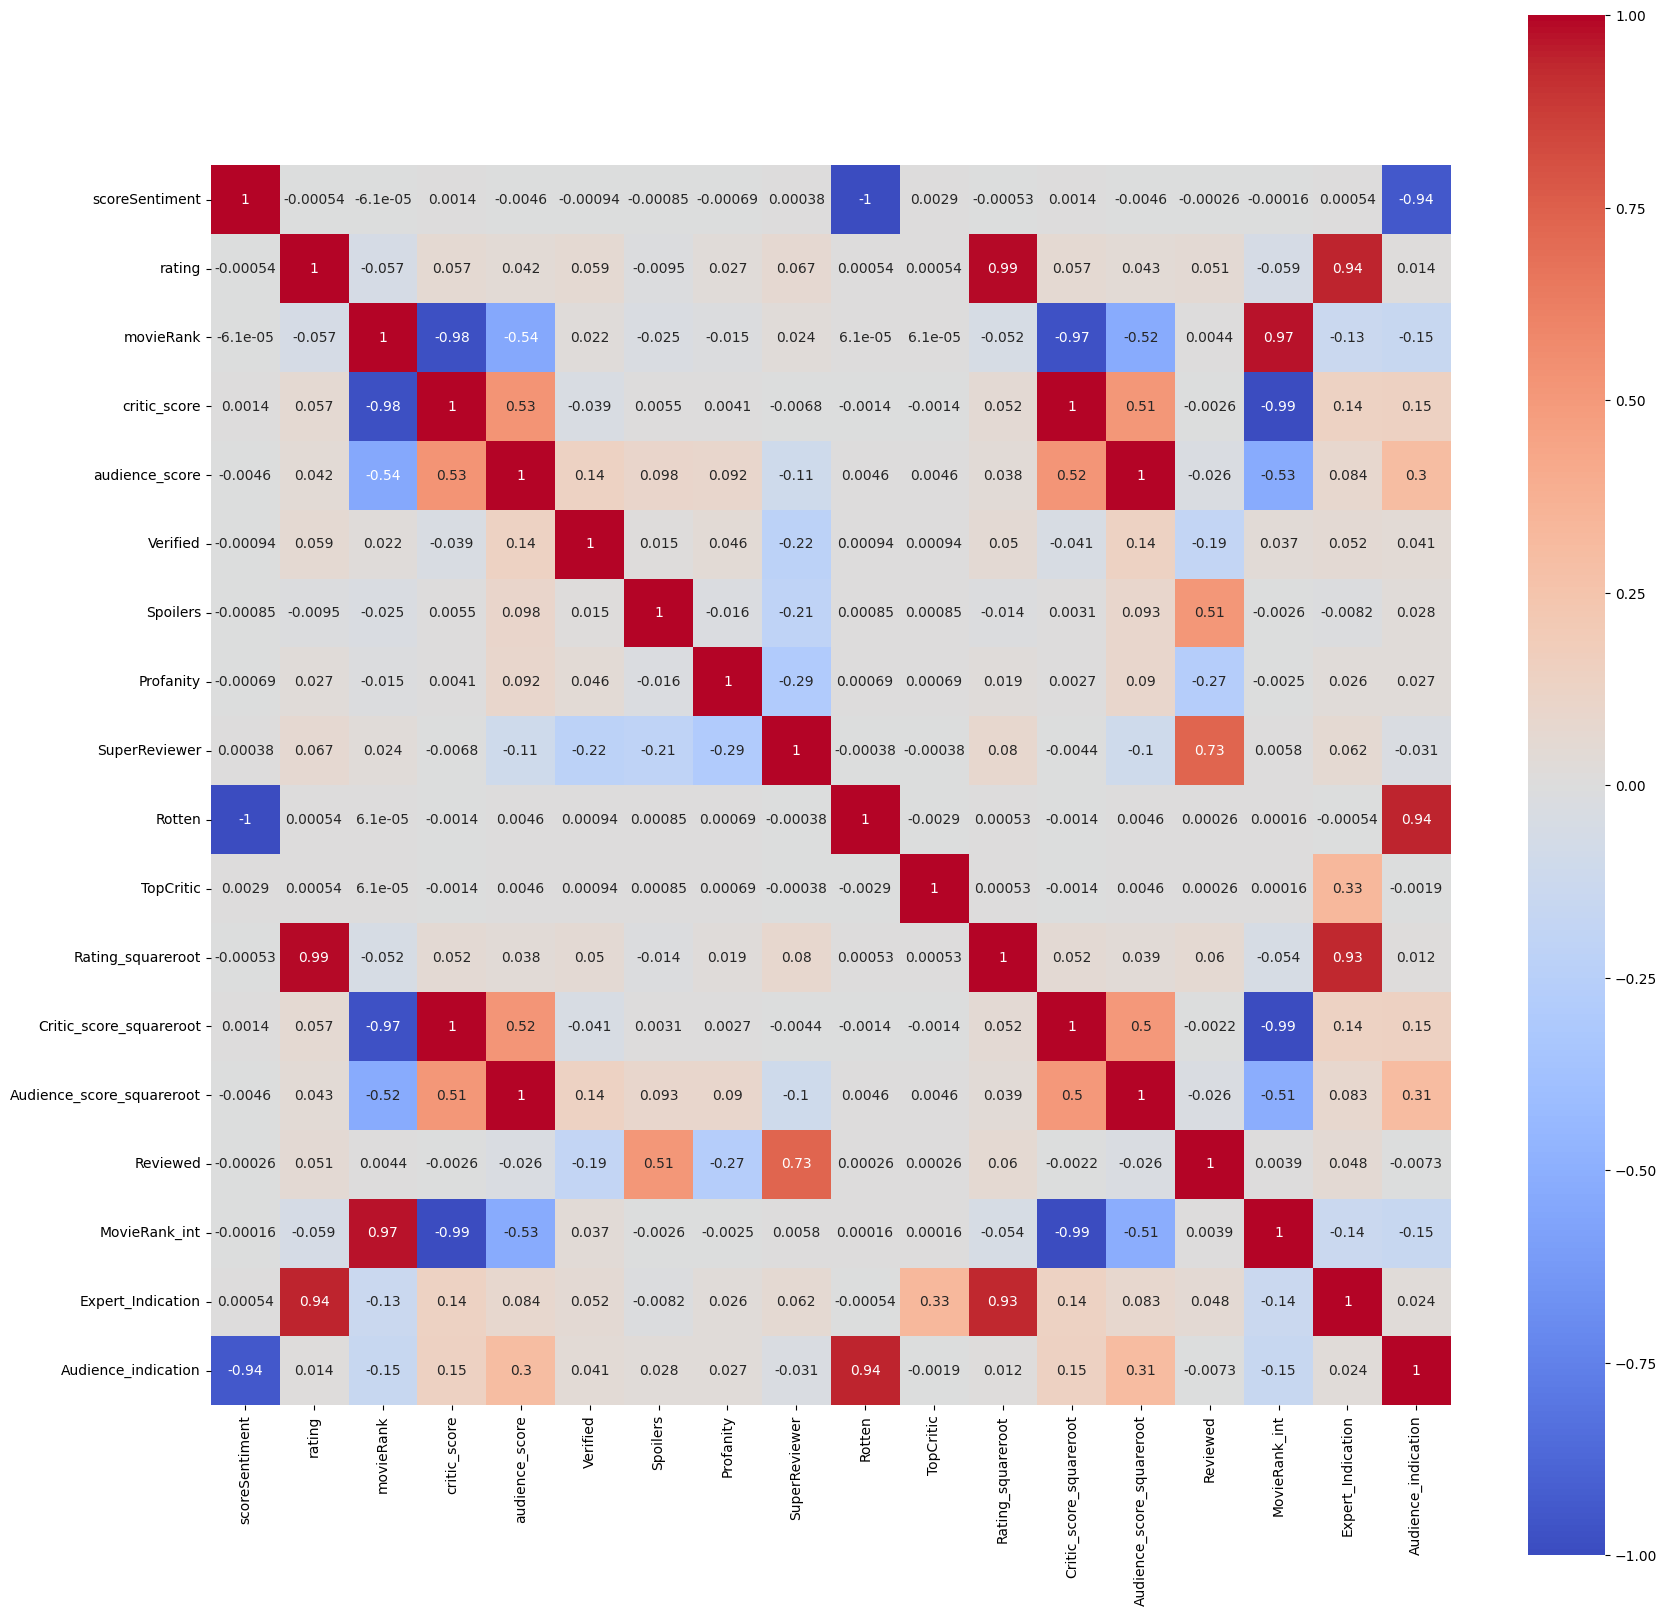

In [42]:
df_corr = df_reviews.corr()
mask = ~((df_corr > 0.1) | (df_corr< -0.1))
plt.figure(figsize=(20,20))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', square=True)

In [43]:
df_reviews.columns

Index(['scoreSentiment', 'rating', 'movieRank', 'critic_score',
       'audience_score', 'Verified', 'Spoilers', 'Profanity', 'SuperReviewer',
       'Rotten', 'TopCritic', 'Rating_squareroot', 'Critic_score_squareroot',
       'Audience_score_squareroot', 'Reviewed', 'MovieRank_int',
       'Expert_Indication', 'Audience_indication'],
      dtype='object')

## Choosing the features for the model

Will use these as the features to predict movieRank
* Audience_score_squareroot
* Expert_indication
* audience_indication

In [44]:
df_final = df_reviews[['Audience_score_squareroot', 'Expert_Indication', 'Audience_indication', 'movieRank',]]

In [45]:
df_final.head()

,Audience_score_squareroot,Expert_Indication,Audience_indication,movieRank
0,0.888819,3.96,-0.235722,3
1,0.866025,5.97,0.559616,2
2,0.866025,3.47,-0.287682,2
3,0.866025,4.17,0.559616,81
4,0.866025,5.06,0.559616,99


Checkign the balance of the dataset

In [46]:
df_final['movieRank'].value_counts()

movieRank
61    308
37    276
86    264
14    264
4     236
     ... 
92     68
84     64
53     48
11     36
74     36
Name: count, Length: 100, dtype: int64

In [47]:
df_final.describe()

,Audience_score_squareroot,Expert_Indication,Audience_indication,movieRank
count,12309.000000,12309.00000,12309.000000,12309.000000
mean,0.886288,4.26340,0.163757,50.409781
std,0.077407,1.52528,0.440245,29.887424
min,0.538516,1.01000,-1.237874,1.000000
25%,0.848528,3.01000,-0.198451,24.000000
50%,0.905539,4.37000,-0.020203,51.000000
75%,0.948683,5.44000,0.598837,78.000000
max,0.989949,6.97000,0.683097,100.000000


In [48]:
df_final.corr()

,Audience_score_squareroot,Expert_Indication,Audience_indication,movieRank
Audience_score_squareroot,1.000000,0.083425,0.305878,-0.524840
Expert_Indication,0.083425,1.000000,0.024188,-0.133985
Audience_indication,0.305878,0.024188,1.000000,-0.153258
movieRank,-0.524840,-0.133985,-0.153258,1.000000


In [49]:
df_corr = df_final.corr()

In [50]:
#mask = ~((df_corr > 0.1) | (df_corr< -0.1))

<Axes: >

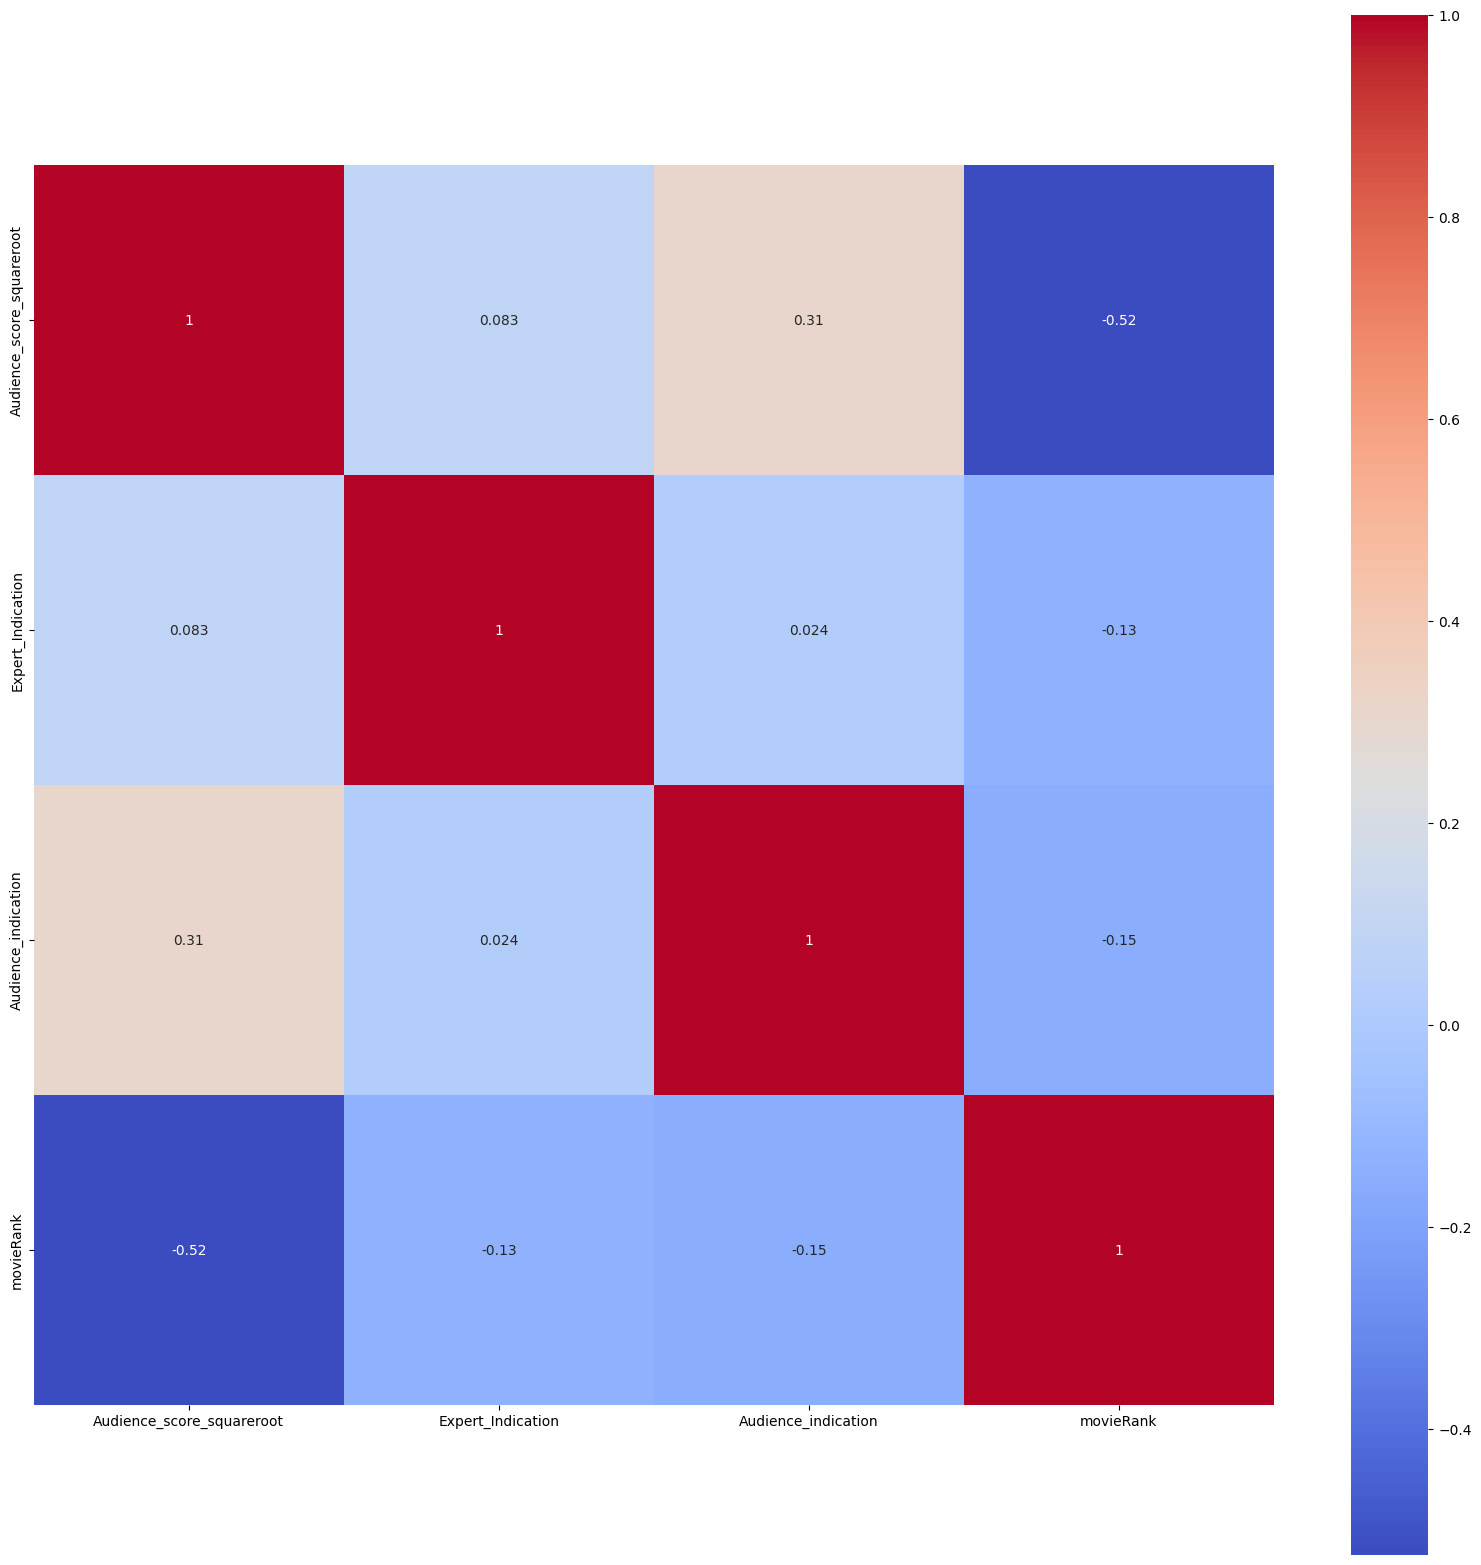

In [51]:
plt.figure(figsize=(20,20))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', square=True)

Concerned about potential multicollinearity and may need to drop columns that are highly correlated later

In [52]:
df_final.head()

,Audience_score_squareroot,Expert_Indication,Audience_indication,movieRank
0,0.888819,3.96,-0.235722,3
1,0.866025,5.97,0.559616,2
2,0.866025,3.47,-0.287682,2
3,0.866025,4.17,0.559616,81
4,0.866025,5.06,0.559616,99


In [53]:
df_final.columns

Index(['Audience_score_squareroot', 'Expert_Indication', 'Audience_indication',
       'movieRank'],
      dtype='object')

Feature and target selection

In [54]:
X = df_final.drop(columns=['movieRank'])
y = df_final['movieRank']

## Importing variance inflation factor to check for multicollinearity.

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12309 entries, 0 to 12308
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Audience_score_squareroot  12309 non-null  float64
 1   Expert_Indication          12309 non-null  float64
 2   Audience_indication        12309 non-null  float64
dtypes: float64(3)
memory usage: 288.6 KB


Using VIF to check for multicollinearity. To keep only those with VIF values below 10.

In [57]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                     feature       VIF
0  Audience_score_squareroot  8.928678
1          Expert_Indication  8.669547
2        Audience_indication  1.163224


All the features have VIF values below 10, so I will keep all the features.

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Instantiating the linear regression model

In [59]:
l_model = LinearRegression()

In [60]:
X_train.value_counts()

Audience_score_squareroot  Expert_Indication  Audience_indication
0.905539                   5.90                0.598837              21
                           4.90               -0.198451              21
0.932738                   5.85               -0.139262              21
0.883176                   4.29                0.576613              20
                           4.79               -0.248461              20
                                                                     ..
0.905539                   1.26               -0.198451               1
0.812404                   6.31               -0.415515               1
0.714143                   5.44               -0.673345               1
0.969536                   1.35                0.662688               1
0.768115                   6.83                0.463734               1
Name: count, Length: 2290, dtype: int64

In [61]:
X_train.describe()

,Audience_score_squareroot,Expert_Indication,Audience_indication
count,9847.000000,9847.000000,9847.000000
mean,0.886697,4.272999,0.160750
std,0.077222,1.520823,0.440094
min,0.538516,1.010000,-1.237874
25%,0.848528,3.070000,-0.198451
50%,0.905539,4.370000,-0.020203
75%,0.948683,5.450000,0.598837
max,0.989949,6.970000,0.683097


In [62]:
y_train.value_counts()

movieRank
61    245
14    227
37    225
86    207
4     194
     ... 
70     55
84     51
53     38
11     27
74     27
Name: count, Length: 100, dtype: int64

Importing standard scaler to scale the data

In [63]:
from sklearn.preprocessing import StandardScaler

Using standard scaler to scale the data

In [64]:
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

In [65]:
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

Fitting and training the model

In [66]:
l_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [67]:
lr_y_pred = l_model.predict(X_test_scaled)

In [68]:
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_rmse = (mean_squared_error(y_test, lr_y_pred))**0.5
lr_r2 = r2_score(y_test, lr_y_pred)

In [69]:
print(f'Logistics Regression Mean Squared Error: {lr_mse}')
print(f'Logistics Regression Root Mean Squared Error: {lr_rmse}')
print(f'Logistics Regression R2 Score: {lr_r2}')

Logistics Regression Mean Squared Error: 3358.2279861892644
Logistics Regression Root Mean Squared Error: 57.95021989767825
Logistics Regression R2 Score: -2.8252390509372693


Because Logistics regression model is poor at predicting the movie rank, I will try a different model.

## KNN Model 
Finding the best K value

In [70]:
neighbors_c = np.arange(1,13)
train_accuracy_c = []
test_accuracy_c = []

for neighbor in neighbors_c:
    knn = KNeighborsRegressor(n_neighbors=neighbor)
    knn.fit(X_train_scaled, y_train_scaled)

    train_accuracy = knn.score(X_train_scaled, y_train_scaled)
    train_accuracy_c.append(train_accuracy)

    test_accuracy = knn.score(X_test_scaled, y_test_scaled)
    test_accuracy_c.append(test_accuracy)

print("Neighbors: ", neighbors_c)
print("Training Accuracy: ", train_accuracy_c)
print("Test Accuracy: ", test_accuracy_c)

Neighbors:  [ 1  2  3  4  5  6  7  8  9 10 11 12]
Training Accuracy:  [0.999816241430752, 0.995118962538775, 0.987735829551098, 0.9772033865804182, 0.9635275720024751, 0.9474618468694309, 0.9289610564511929, 0.910121821286344, 0.8931535720131665, 0.8798280425095079, 0.8680330297290848, 0.8574951745098823]
Test Accuracy:  [0.9835848835970092, 0.9734277989935098, 0.9561080185474308, 0.9389573557736914, 0.922819213230566, 0.9078571533494005, 0.8905338665094541, 0.8738608995427886, 0.8584810289175223, 0.8457812768371351, 0.8329416709374878, 0.8200417521703514]


Plotting the KNN model to see best k value

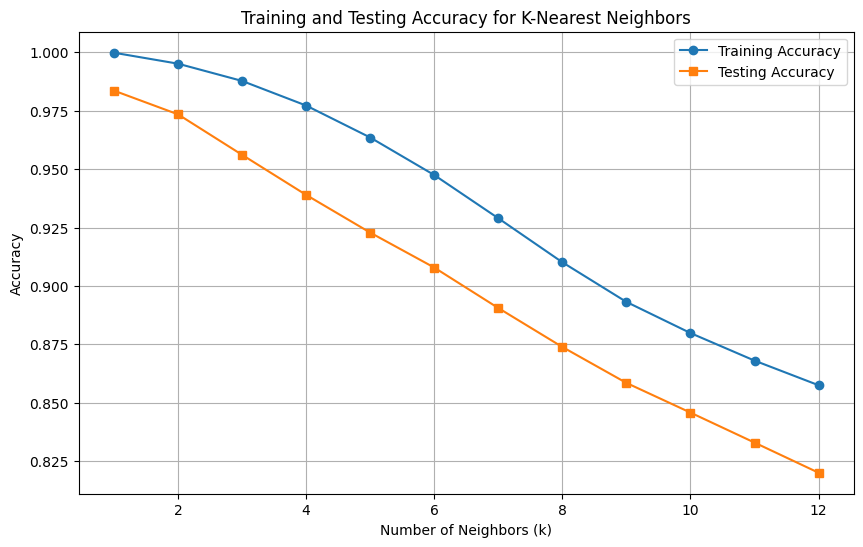

In [71]:
plt.figure(figsize=(10, 6))
plt.plot(neighbors_c, train_accuracy_c, label='Training Accuracy', marker='o')
plt.plot(neighbors_c, test_accuracy_c, label='Testing Accuracy', marker='s')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy for K-Nearest Neighbors')
plt.legend()
plt.grid(True)
plt.show()

Using K value of 1 or 2 will give best outcomes but may result in overfitting. Will use K value of 3.

In [72]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_scaled, y_train_scaled)

KNeighborsRegressor(n_neighbors=3)

In [73]:
y_knn_pred = knn.predict(X_test_scaled)

In [75]:
knn_mse = mean_squared_error(y_test, y_knn_pred)
knn_rmse = np.sqrt(knn_mse)
knn_r2 = r2_score(y_test, y_knn_pred)

In [76]:
print(f"KNN Mean Squared Error: {knn_mse}")
print(f"KNN Root Mean Squared Error: {knn_rmse}")
print(f"KNN R2 Score: {knn_r2}")

KNN Mean Squared Error: 3321.6509460987227
KNN Root Mean Squared Error: 57.63376567689051
KNN R2 Score: -2.7835754346796944


KNN Model outcome is very similar to the linear regression model. Will try a different model.

## Random Forest Model

Initializing the Random Forest model

In [77]:
forest = RandomForestRegressor(random_state=42)
forest.fit(X_train_scaled, y_train_scaled)

RandomForestRegressor(random_state=42)

In [78]:
y_forest_pred= forest.predict(X_test_scaled)

In [79]:
forest_mse = mean_squared_error(y_test, y_knn_pred)
forest_rmse = np.sqrt(forest_mse)
forest_r2 = r2_score(y_test, y_knn_pred)

In [80]:
print(f"Random Forest Mean Squared Error: {forest_mse}")
print(f"Random Forest Root Mean Squared Error: {forest_rmse}")
print(f"Random Forest R2 Score: {forest_r2}")

Random Forest Mean Squared Error: 3321.6509460987227
Random Forest Root Mean Squared Error: 57.63376567689051
Random Forest R2 Score: -2.7835754346796944


Radom forest model produces similar results to the linear regression and KNN models. Will try a different model.

## Hyperparameter Tuning and Cross-Validation with GridSearchCV.

In [81]:
from sklearn.model_selection import GridSearchCV

### KNN Regression Hyperparameter Tuning
Will use param_grid_knn dictionary to find the best parameters for the KNN model. Will check both uniform and distance weights, as well as the different metrics for the algorithm with a range of neighbors from 1 to 30.

In [82]:
param_grid_knn = {
    'n_neighbors': np.arange(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

Initializing the KNN model

In [83]:
knn = KNeighborsRegressor()

Initialize GridSearchCV with the KNN model, param_grid_knn, and cv=5

In [84]:
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='neg_mean_squared_error')


Fitting the model with the best parameters found by GridSearchCV.

In [85]:
grid_search_knn.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

Checking best parameters and scores

In [86]:
print("GridSearchCV Best parameters for KNN:", grid_search_knn.best_params_)
print("GridSearchCV Best cross-validated MSE for KNN:", -grid_search_knn.best_score_)

GridSearchCV Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
GridSearchCV Best cross-validated MSE for KNN: 27.963165653170204


Predict using the best estimator

In [87]:
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)

Evaluating the model

In [88]:
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"GridSearchCV KNN - MSE: {mse_knn}")
print(f"GridSearchCV KNN RMSE: {rmse_knn}")
print(f"GridSearchCV KNN R2 Score: {r2_knn}")


GridSearchCV KNN - MSE: 13.410253095497533
GridSearchCV KNN RMSE: 3.6620012418754766
GridSearchCV KNN R2 Score: 0.9847248536922417


Random Forest Regression Hyperparameter Tuning

In [89]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

Initialising the model

In [94]:
forest = RandomForestRegressor(random_state=42)

Initialising GridSearchCV for Random Forest 

In [95]:
grid_search_rf = GridSearchCV(forest, param_grid_rf, cv=5, scoring='neg_mean_squared_error')


Fit the model

In [96]:
grid_search_rf.fit(X_train_scaled, y_train)

c:\Users\aa1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\aa1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\aa1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\aa1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", l

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

Checking best parameters and score for Random Forest

In [97]:
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validated MSE for Random Forest:", -grid_search_rf.best_score_)

Best parameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validated MSE for Random Forest: 40.77323431994411


Predict the best estimator to use. 

In [98]:
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)

Evaluate the model

In [101]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"GridSearchCV Random Forest MSE: {mse_rf}")
print(f"GridSearchCV RMSE: {rmse_rf}")
print(f"GridSearchCV R2 Score: {r2_rf}")

GridSearchCV Random Forest MSE: 20.18703361343738
GridSearchCV RMSE: 4.492998287718056
GridSearchCV R2 Score: 0.9770056620282266


### Comparing all the Mean Squared Errors of the models

In [103]:
print(f'Logistics Regression Mean Squared Error: {lr_mse}')
print(f"KNN Mean Squared Error: {knn_mse}")
print(f"Random Forest Mean Squared Error: {forest_mse}")
print(f"GridSearchCV KNN MSE: {mse_knn}")
print(f"GridSearchCV Random Forest MSE: {mse_rf}")

Logistics Regression Mean Squared Error: 3358.2279861892644
KNN Mean Squared Error: 3321.6509460987227
Random Forest Mean Squared Error: 3321.6509460987227
GridSearchCV KNN MSE: 13.410253095497533
GridSearchCV Random Forest MSE: 20.18703361343738


## Comparing all the Root Mean Squared Errors of the models

In [104]:
print(f'Logistics Regression Root Mean Squared Error: {lr_rmse}')
print(f"KNN Root Mean Squared Error: {knn_rmse}")
print(f"Random Forest Root Mean Squared Error: {forest_rmse}")
print(f"GridSearchCV KNN RMSE: {rmse_knn}")
print(f"GridSearchCV Random Forest RMSE: {rmse_rf}")

Logistics Regression Root Mean Squared Error: 57.95021989767825
KNN Root Mean Squared Error: 57.63376567689051
Random Forest Root Mean Squared Error: 57.63376567689051
GridSearchCV KNN RMSE: 3.6620012418754766
GridSearchCV Random Forest RMSE: 4.492998287718056


## Comparing all R2 scores of the models

In [105]:
print(f'Logistics Regression R2 Score: {lr_r2}')
print(f"KNN R2 Score: {knn_r2}")
print(f"Random Forest R2 Score: {forest_r2}")
print(f"GridSearchCV Random Forest R2 Score: {r2_rf}")
print(f"GridSearchCV KNN R2 Score: {r2_knn}")

Logistics Regression R2 Score: -2.8252390509372693
KNN R2 Score: -2.7835754346796944
Random Forest R2 Score: -2.7835754346796944
GridSearchCV Random Forest R2 Score: 0.9770056620282266
GridSearchCV KNN R2 Score: 0.9847248536922417


## Conclusion

Best model is GridSearchCV KNN with
* R2 score of 98.5%
* RMSE of 3.66
* MSE of 13.41